# Import Libraries

In [19]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Settings adjustments

In [20]:
#Set default decimal point to not be scientific notation
pd.set_option('display.float_format', lambda x: '%.0f' % x)

In [21]:
# Ensure pandas shows all columns in dataframe
pd.set_option('display.max_columns', None)

# Import Dataframe

In [22]:
# Define the path
path = r'/Users/quincy/Documents/CF_Da/6/Airbnb Berlin/02 Data/Original Data/'

# Join the path and filename
file_path0 = os.path.join(path, 'listings.csv')
# Join the path and filename
file_path1 = os.path.join(path, 'listings_detail.csv')


In [23]:
# Define main dataframe
df_listing = pd.read_csv(file_path0)
df_listing_detail = pd.read_csv(file_path1)

# Cleaning Dataset

In [24]:
df_listing_detail.head()

id                         listing_url       scrape_id last_scraped  \
0   3176   https://www.airbnb.com/rooms/3176  20240324214732   2024-03-25   
1   9991   https://www.airbnb.com/rooms/9991  20240324214732   2024-03-25   
2  14325  https://www.airbnb.com/rooms/14325  20240324214732   2024-03-25   
3  16644  https://www.airbnb.com/rooms/16644  20240324214732   2024-03-25   
4  17904  https://www.airbnb.com/rooms/17904  20240324214732   2024-03-25   

        source                                           name  \
0  city scrape                Fabulous Flat in great Location   
1  city scrape            Geourgeous flat - outstanding views   
2  city scrape            Studio Apartment in Prenzlauer Berg   
3  city scrape             In the Heart of Berlin - Kreuzberg   
4  city scrape  Beautiful Kreuzberg studio - 3 months minimum   

                                         description  \
0  This beautiful first floor apartment  is situa...   
1  4 bedroom with very large windows and outstand...   
2  The apartment is located on the upper second f...   
3  Light and sunny 2-Room-turn of the century-fla...   
4  - apt is available starting September 1, 2024<...   

                               neighborhood_overview  \
0  The neighbourhood is famous for its variety of...   
1  Prenzlauer Berg is an amazing neighbourhood wh...   
2                                                NaN   
3  Our Part of Kreuzberg is just the best. Good v...   
4                                                NaN   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/243355/84afcf...     3718   
1  https://a0.muscache.com/pictures/42799131/59c8...    33852   
2  https://a0.muscache.com/pictures/508703/24988a...    55531   
3  https://a0.muscache.com/pictures/73759174/e2ef...    64696   
4  https://a0.muscache.com/pictures/d9a6f8be-54b9...    68997   

                                  host_url       host_name  host_since  \
0   https://www.airbnb.com/users/show/3718          Britta  2008-10-19   
1  https://www.airbnb.com/users/show/33852         Philipp  2009-08-25   
2  https://www.airbnb.com/users/show/55531  Chris + Oliver  2009-11-18   
3  https://www.airbnb.com/users/show/64696            Rene  2009-12-20   
4  https://www.airbnb.com/users/show/68997        Matthias  2010-01-08   

            host_location                                         host_about  \
0     Coledale, Australia  We love to travel ourselves a lot and prefer t...   
1         Berlin, Germany  Born in Munich - lives in and loves Berlin. Wo...   
2         Berlin, Germany           From Berlin, Germany. We love to travel!   
3          Santa Cruz, CA  Friendly and social. Likes to travel and enjoy...   
4  Rio de Janeiro, Brazil  I  am a  journalist/writer. Lived  in NYC for ...   

   host_response_time host_response_rate host_acceptance_rate  \
0                 NaN                NaN                   0%   
1  a few days or more                 0%                   0%   
2        within a day               100%                  36%   
3  within a few hours               100%                  50%   
4      within an hour               100%                  98%   

  host_is_superhost                                 host_thumbnail_url  \
0                 f  https://a0.muscache.com/im/users/3718/profile_...   
1                 f  https://a0.muscache.com/im/users/33852/profile...   
2                 t  https://a0.muscache.com/im/users/55531/profile...   
3                 f  https://a0.muscache.com/im/users/64696/profile...   
4                 t  https://a0.muscache.com/im/pictures/user/67b13...   

                                    host_picture_url host_neighbourhood  \
0  https://a0.muscache.com/im/users/3718/profile_...    Prenzlauer Berg   
1  https://a0.muscache.com/im/users/33852/profile...    Prenzlauer Berg   
2  https://a0.muscache.com/im/users/55531/profile...    Prenzlauer Berg   
3  https://a0.muscache.co

In [25]:
df_listing.head()

id                                           name  host_id  \
0   3176                Fabulous Flat in great Location     3718   
1   9991            Geourgeous flat - outstanding views    33852   
2  14325            Studio Apartment in Prenzlauer Berg    55531   
3  16644             In the Heart of Berlin - Kreuzberg    64696   
4  17904  Beautiful Kreuzberg studio - 3 months minimum    68997   

        host_name       neighbourhood_group             neighbourhood  \
0          Britta                    Pankow   Prenzlauer Berg Südwest   
1         Philipp                    Pankow   Prenzlauer Berg Südwest   
2  Chris + Oliver                    Pankow  Prenzlauer Berg Nordwest   
3            Rene  Friedrichshain-Kreuzberg     nördliche Luisenstadt   
4        Matthias                  Neukölln              Reuterstraße   

   latitude  longitude        room_type  price  minimum_nights  \
0        53         13  Entire home/apt     83              63   
1        53         13  Entire home/apt    180               6   
2        53         13  Entire home/apt     70             150   
3        53         13  Entire home/apt     90              93   
4        52         13  Entire home/apt     25              92   

   number_of_reviews last_review  reviews_per_month  \
0                148  2023-05-25                  1   
1                  7  2020-01-04                  0   
2                 26  2023-11-30                  0   
3                 48  2017-12-14                  0   
4                299  2022-12-01                  2   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
0                               1               112                      1   
1                               1                17                      0   
2                               4               204                      1   
3                               2               230                      0   
4                               1                 1                      0   

                                             license  
0  First name and Last name: Nicolas Krotz <br/> ...  
1                                  03/Z/RA/003410-18  
2                                                NaN  
3                                                NaN  
4                                                NaN

In [26]:
#Find all values in neighbourhood_group: Using .loc[] accessor
df_listing.loc[:, 'neighbourhood_group'].value_counts(dropna=False)

neighbourhood_group
Friedrichshain-Kreuzberg    2937
Mitte                       2919
Pankow                      2115
Neukölln                    1528
Charlottenburg-Wilm.        1277
Tempelhof - Schöneberg       889
Treptow - Köpenick           527
Lichtenberg                  380
Steglitz - Zehlendorf        352
Reinickendorf                195
Spandau                      130
Marzahn - Hellersdorf        113
Name: count, dtype: int64

In [27]:
#Create a new column assigning values per neighborhood
# Create code for neighb_type in new column
neighb_group_mapping = {
    "Friedrichshain-Kreuzberg": 0,
    "Mitte": 1,
    "Pankow": 2,
    "Neukölln": 3,
    "Charlottenburg-Wilm.": 4,
    "Tempelhof - Schöneberg": 5,
    "Treptow - Köpenick": 6,
    "Lichtenberg": 7,
    "Steglitz - Zehlendorf": 8,
    "Reinickendorf": 9,
    "Spandau": 10,
    "Marzahn - Hellersdorf": 11
}
df_listing['neighb_type'] = df_listing['neighbourhood_group'].map(neighb_group_mapping)

In [28]:
df_listing.head()

id                                           name  host_id  \
0   3176                Fabulous Flat in great Location     3718   
1   9991            Geourgeous flat - outstanding views    33852   
2  14325            Studio Apartment in Prenzlauer Berg    55531   
3  16644             In the Heart of Berlin - Kreuzberg    64696   
4  17904  Beautiful Kreuzberg studio - 3 months minimum    68997   

        host_name       neighbourhood_group             neighbourhood  \
0          Britta                    Pankow   Prenzlauer Berg Südwest   
1         Philipp                    Pankow   Prenzlauer Berg Südwest   
2  Chris + Oliver                    Pankow  Prenzlauer Berg Nordwest   
3            Rene  Friedrichshain-Kreuzberg     nördliche Luisenstadt   
4        Matthias                  Neukölln              Reuterstraße   

   latitude  longitude        room_type  price  minimum_nights  \
0        53         13  Entire home/apt     83              63   
1        53         13  Entire home/apt    180               6   
2        53         13  Entire home/apt     70             150   
3        53         13  Entire home/apt     90              93   
4        52         13  Entire home/apt     25              92   

   number_of_reviews last_review  reviews_per_month  \
0                148  2023-05-25                  1   
1                  7  2020-01-04                  0   
2                 26  2023-11-30                  0   
3                 48  2017-12-14                  0   
4                299  2022-12-01                  2   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
0                               1               112                      1   
1                               1                17                      0   
2                               4               204                      1   
3                               2               230                      0   
4                               1                 1                      0   

                                             license  neighb_type  
0  First name and Last name: Nicolas Krotz <br/> ...            2  
1                                  03/Z/RA/003410-18            2  
2                                                NaN            2  
3                                                NaN            0  
4                                                NaN            3

In [29]:
#Check numbers for room type 
df_listing.loc[:, 'neighb_type'].value_counts(dropna=False)

neighb_type
0     2937
1     2919
2     2115
3     1528
4     1277
5      889
6      527
7      380
8      352
9      195
10     130
11     113
Name: count, dtype: int64

In [30]:
#Find all values in price: Using .loc[] accessor
df_listing.loc[:, 'price'].value_counts(dropna=False)

price
NaN    4962
80      203
100     172
60      168
120     143
       ... 
346       1
316       1
364       1
365       1
247       1
Name: count, Length: 498, dtype: int64

In [31]:
# it appears that a bunch of listings don't have a price listed

In [32]:
# Create a new DataFrame df_priceless containing rows where 'price' is NaN
df_priceless = df_listing[df_listing['price'].isna()]

# Remove rows where 'price' is NaN from the original DataFrame df_listing
df_listing = df_listing.dropna(subset=['price'])

# Verify the results
print("DataFrame df_priceless:")
print(df_priceless)

print("\nDataFrame df_listing:")
print(df_listing)


DataFrame df_priceless:
                        id                                           name  \
6                    21869               Studio in the Heart of Kreuzberg   
9                    23834               Apartment in the heart of Berlin   
14                   37004  WONDERFUL ROOM for a bubble in Berlin Central   
16                   41217                                 Beautiful room   
19                   44423                 Lovely accommodation in Berlin   
...                    ...                                            ...   
13034  1093358204116046834                 Light flooded modern Apartment   
13035  1093493893989582353                 Beautiful Altbau in Schöneberg   
13046  1094166512207469963             Berlin apartment with outside area   
13055  1094703143284006810          Moabit-3 Zimmer Wohnung in guter Lage   
13078  1096386826689684748                Room in a Cozy modern apartment   

         host_id   host_name       neighbourhood_gr

In [33]:
# Join the 'review_scores_rating' column from df_listing_detail into df_listing using the common column 'id'
df_listing = df_listing.merge(df_listing_detail[['id', 'review_scores_rating']], on='id', how='left')


In [34]:
#check merge
df_listing.head()

id                                           name  host_id  \
0   3176                Fabulous Flat in great Location     3718   
1   9991            Geourgeous flat - outstanding views    33852   
2  14325            Studio Apartment in Prenzlauer Berg    55531   
3  16644             In the Heart of Berlin - Kreuzberg    64696   
4  17904  Beautiful Kreuzberg studio - 3 months minimum    68997   

        host_name       neighbourhood_group             neighbourhood  \
0          Britta                    Pankow   Prenzlauer Berg Südwest   
1         Philipp                    Pankow   Prenzlauer Berg Südwest   
2  Chris + Oliver                    Pankow  Prenzlauer Berg Nordwest   
3            Rene  Friedrichshain-Kreuzberg     nördliche Luisenstadt   
4        Matthias                  Neukölln              Reuterstraße   

   latitude  longitude        room_type  price  minimum_nights  \
0        53         13  Entire home/apt     83              63   
1        53         13  Entire home/apt    180               6   
2        53         13  Entire home/apt     70             150   
3        53         13  Entire home/apt     90              93   
4        52         13  Entire home/apt     25              92   

   number_of_reviews last_review  reviews_per_month  \
0                148  2023-05-25                  1   
1                  7  2020-01-04                  0   
2                 26  2023-11-30                  0   
3                 48  2017-12-14                  0   
4                299  2022-12-01                  2   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
0                               1               112                      1   
1                               1                17                      0   
2                               4               204                      1   
3                               2               230                      0   
4                               1                 1                      0   

                                             license  neighb_type  \
0  First name and Last name: Nicolas Krotz <br/> ...            2   
1                                  03/Z/RA/003410-18            2   
2                                                NaN            2   
3                                                NaN            0   
4                                                NaN            3   

   review_scores_rating  
0                     5  
1                     5  
2                     5  
3                     5  
4                     5

In [35]:
df_listing.head()

id                                           name  host_id  \
0   3176                Fabulous Flat in great Location     3718   
1   9991            Geourgeous flat - outstanding views    33852   
2  14325            Studio Apartment in Prenzlauer Berg    55531   
3  16644             In the Heart of Berlin - Kreuzberg    64696   
4  17904  Beautiful Kreuzberg studio - 3 months minimum    68997   

        host_name       neighbourhood_group             neighbourhood  \
0          Britta                    Pankow   Prenzlauer Berg Südwest   
1         Philipp                    Pankow   Prenzlauer Berg Südwest   
2  Chris + Oliver                    Pankow  Prenzlauer Berg Nordwest   
3            Rene  Friedrichshain-Kreuzberg     nördliche Luisenstadt   
4        Matthias                  Neukölln              Reuterstraße   

   latitude  longitude        room_type  price  minimum_nights  \
0        53         13  Entire home/apt     83              63   
1        53         13  Entire home/apt    180               6   
2        53         13  Entire home/apt     70             150   
3        53         13  Entire home/apt     90              93   
4        52         13  Entire home/apt     25              92   

   number_of_reviews last_review  reviews_per_month  \
0                148  2023-05-25                  1   
1                  7  2020-01-04                  0   
2                 26  2023-11-30                  0   
3                 48  2017-12-14                  0   
4                299  2022-12-01                  2   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
0                               1               112                      1   
1                               1                17                      0   
2                               4               204                      1   
3                               2               230                      0   
4                               1                 1                      0   

                                             license  neighb_type  \
0  First name and Last name: Nicolas Krotz <br/> ...            2   
1                                  03/Z/RA/003410-18            2   
2                                                NaN            2   
3                                                NaN            0   
4                                                NaN            3   

   review_scores_rating  
0                     5  
1                     5  
2                     5  
3                     5  
4                     5

In [36]:
# Join columns from detailed dataset  df_listing_detail onto df_listing using the common column 'id'
df_listing = df_listing.merge(df_listing_detail[['id', 'accommodates','bathrooms','bedrooms','beds','amenities','host_is_superhost','host_response_rate','host_acceptance_rate']], on='id', how='left')

In [37]:
# Join columns from detailed dataset  df_listing_detail onto df_listing using the common column 'id'
df_listing = df_listing.merge(df_listing_detail[['id', 'accommodates','bathrooms','bedrooms','beds','amenities','host_is_superhost','host_response_rate','host_acceptance_rate']], on='id', how='left')

In [38]:
df_listing.head()

id                                           name  host_id  \
0   3176                Fabulous Flat in great Location     3718   
1   9991            Geourgeous flat - outstanding views    33852   
2  14325            Studio Apartment in Prenzlauer Berg    55531   
3  16644             In the Heart of Berlin - Kreuzberg    64696   
4  17904  Beautiful Kreuzberg studio - 3 months minimum    68997   

        host_name       neighbourhood_group             neighbourhood  \
0          Britta                    Pankow   Prenzlauer Berg Südwest   
1         Philipp                    Pankow   Prenzlauer Berg Südwest   
2  Chris + Oliver                    Pankow  Prenzlauer Berg Nordwest   
3            Rene  Friedrichshain-Kreuzberg     nördliche Luisenstadt   
4        Matthias                  Neukölln              Reuterstraße   

   latitude  longitude        room_type  price  minimum_nights  \
0        53         13  Entire home/apt     83              63   
1        53         13  Entire home/apt    180               6   
2        53         13  Entire home/apt     70             150   
3        53         13  Entire home/apt     90              93   
4        52         13  Entire home/apt     25              92   

   number_of_reviews last_review  reviews_per_month  \
0                148  2023-05-25                  1   
1                  7  2020-01-04                  0   
2                 26  2023-11-30                  0   
3                 48  2017-12-14                  0   
4                299  2022-12-01                  2   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
0                               1               112                      1   
1                               1                17                      0   
2                               4               204                      1   
3                               2               230                      0   
4                               1                 1                      0   

                                             license  neighb_type  \
0  First name and Last name: Nicolas Krotz <br/> ...            2   
1                                  03/Z/RA/003410-18            2   
2                                                NaN            2   
3                                                NaN            0   
4                                                NaN            3   

   review_scores_rating  accommodates_x  bathrooms_x  bedrooms_x  beds_x  \
0                     5               4            1           1       2   
1                     5               7            2           4       7   
2                     5               1            1           0       1   
3                     5               4            1           1       1   
4                     5               2            1           0       1   

                                         amenities_x host_is_superhost_x  \
0  ["Hangers", "Crib", "Smoke alarm", "Fire extin...                   f   
1  ["Hangers", "Smoke alarm", "Heating", "Luggage...                   f   
2  ["Hangers", "Smoke alarm", "Heating", "Kitchen...                   t   
3  ["Hangers", "Carbon monoxide alarm", "Smoke al...                   f   
4  ["Hangers", "Self check-in", "Iron", "Heating"...                   t   

  host_response_rate_x host_acceptance_rate_x  accommodates_y  bathrooms_y  \
0                  NaN                     0%               4            1   
1                   0%                     0%               7            2   
2                 100%                    36%               1            1   
3                 100%                    50%               4            1   
4                 100%                    98%               2            1   

   bedrooms_y  beds_y                                        amenities_y  \
0           1       2  ["Hangers", "Crib", "Smoke alarm", "Fire extin...   
1          

In [39]:
# Drop the specified columns from df_listing
df_listing = df_listing.drop(columns=['host_name', 'name'])


In [40]:
df_listing.shape

(8400, 34)

In [41]:
# Create a new column 'has_license' based on the condition
df_listing['has_license'] = np.where(df_listing['license'].isna(), 0, 1)


In [42]:
#drop 'license' column
# Drop the specified columns from df_listing
df_listing = df_listing.drop(columns=['license'])


In [43]:
df_listing.head()

id  host_id       neighbourhood_group             neighbourhood  \
0   3176     3718                    Pankow   Prenzlauer Berg Südwest   
1   9991    33852                    Pankow   Prenzlauer Berg Südwest   
2  14325    55531                    Pankow  Prenzlauer Berg Nordwest   
3  16644    64696  Friedrichshain-Kreuzberg     nördliche Luisenstadt   
4  17904    68997                  Neukölln              Reuterstraße   

   latitude  longitude        room_type  price  minimum_nights  \
0        53         13  Entire home/apt     83              63   
1        53         13  Entire home/apt    180               6   
2        53         13  Entire home/apt     70             150   
3        53         13  Entire home/apt     90              93   
4        52         13  Entire home/apt     25              92   

   number_of_reviews last_review  reviews_per_month  \
0                148  2023-05-25                  1   
1                  7  2020-01-04                  0   
2                 26  2023-11-30                  0   
3                 48  2017-12-14                  0   
4                299  2022-12-01                  2   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
0                               1               112                      1   
1                               1                17                      0   
2                               4               204                      1   
3                               2               230                      0   
4                               1                 1                      0   

   neighb_type  review_scores_rating  accommodates_x  bathrooms_x  bedrooms_x  \
0            2                     5               4            1           1   
1            2                     5               7            2           4   
2            2                     5               1            1           0   
3            0                     5               4            1           1   
4            3                     5               2            1           0   

   beds_x                                        amenities_x  \
0       2  ["Hangers", "Crib", "Smoke alarm", "Fire extin...   
1       7  ["Hangers", "Smoke alarm", "Heating", "Luggage...   
2       1  ["Hangers", "Smoke alarm", "Heating", "Kitchen...   
3       1  ["Hangers", "Carbon monoxide alarm", "Smoke al...   
4       1  ["Hangers", "Self check-in", "Iron", "Heating"...   

  host_is_superhost_x host_response_rate_x host_acceptance_rate_x  \
0                   f                  NaN                     0%   
1                   f                   0%                     0%   
2                   t                 100%                    36%   
3                   f                 100%                    50%   
4                   t                 100%                    98%   

   accommodates_y  bathrooms_y  bedrooms_y  beds_y  \
0               4            1           1       2   
1               7            2           4       7   
2               1            1           0       1   
3               4            1           1       1   
4               2            1           0       1   

                                         amenities_y host_is_superhost_y  \
0  ["Hangers", "Crib", "Smoke alarm", "Fire extin...                   f   
1  ["Hangers", "Smoke alarm", "Heating", "Luggage...                   f   
2  ["Hangers", "Smoke alarm", "Heating", "Kitchen...                   t   
3  ["Hangers", "Carbon monoxide alarm", "Smoke al...                   f   
4  ["Hangers", "Self check-in", "Iron", "Heating"...                   t   

  host_response_rate_y host_acceptance_rate_y  has_license  
0                  NaN                     0%            1  
1                   0%                     0%            1  
2                 100%                    36%            0  
3                 100%                    50%            

In [44]:
#Check numbers for room type 
df_listing.loc[:, 'room_type'].value_counts(dropna=False)

room_type
Entire home/apt    6126
Private room       2065
Shared room         117
Hotel room           92
Name: count, dtype: int64

In [45]:

# Create code for room_type in new column
room_type_mapping = {
    "Entire home/apt": 0,
    "Private room": 1,
    "Shared room": 2,
    "Hotel room": 3
}
df_listing['room_type2'] = df_listing['room_type'].map(room_type_mapping)

# Exploratory Analysis


Text(0.5, 1.0, 'Correlation Matrix Heatmap for all non-string variables')

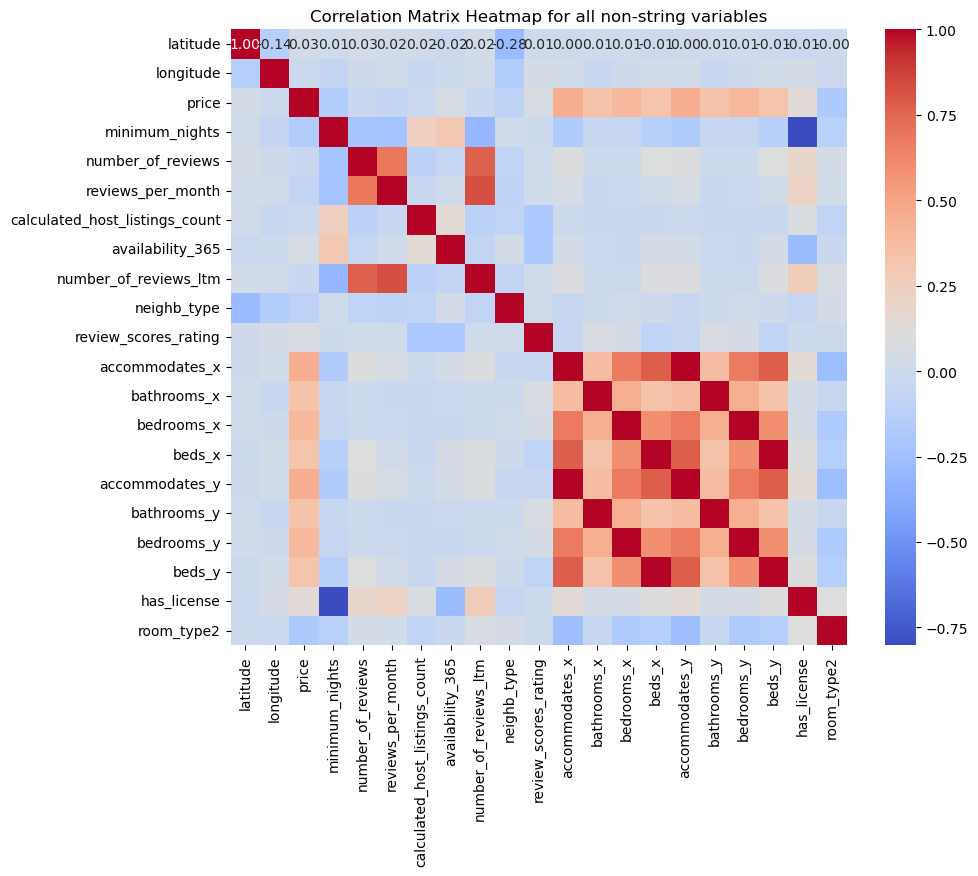

In [46]:
# Compute the correlation matrix and skip string columns
numeric_columns = df_listing.select_dtypes(include=[np.number]).drop(columns=['id', 'host_id'])
corr_matrix_1 = numeric_columns.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(corr_matrix_1, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

# Add title
plt.title('Correlation Matrix Heatmap for all non-string variables')


## Observations
Looking at the results here, we can see that there's a relationship between # of reviews last month and reviews per month and total number of reviews.  (Perhaps not so interesting as these were likely calcualted off of each other)
Also not surprising that number of beds and the number of people a place can accommodate are linked. 
It does look like there might be a relationship between having a license and the minimum number of nights that you can book. We can explore this later. 
Looks like there might be a slight relationship between the price and the number of people a place can accommodate--again not shocking.


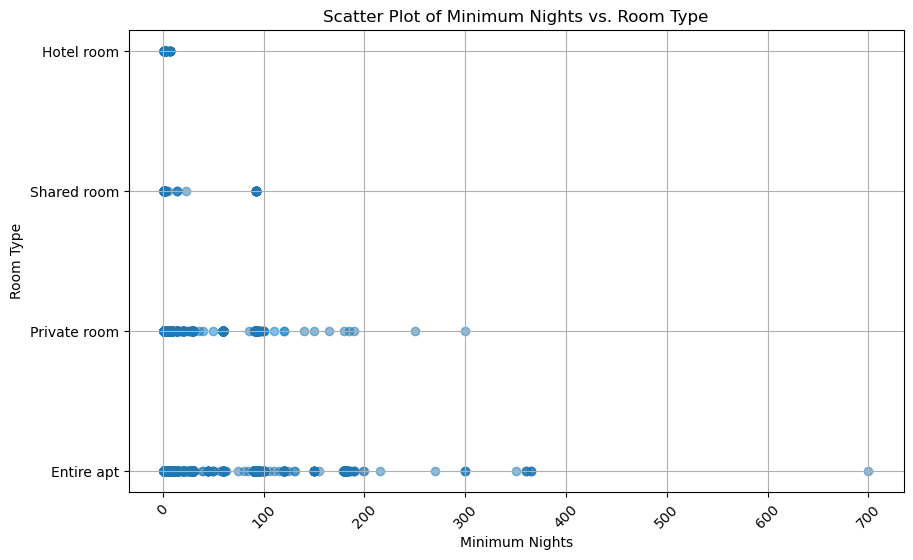

In [47]:
#Let's make a scatter plot with minimum nights and room type
# Define the y-axis ticks and labels
room_type_labels = np.unique(df_listing['room_type2'])
room_type_names = ["Entire apt", "Private room", "Shared room", "Hotel room"]

plt.figure(figsize=(10, 6))
plt.scatter(df_listing['minimum_nights'], df_listing['room_type2'], alpha=0.5)
plt.title('Scatter Plot of Minimum Nights vs. Room Type')
plt.xlabel('Minimum Nights')
plt.ylabel('Room Type')
plt.xticks(rotation=45)
plt.yticks(room_type_labels, room_type_names)  # Set custom y-ticks and labels
plt.grid(True)

Text(0, 0.5, 'Minimum Nights')

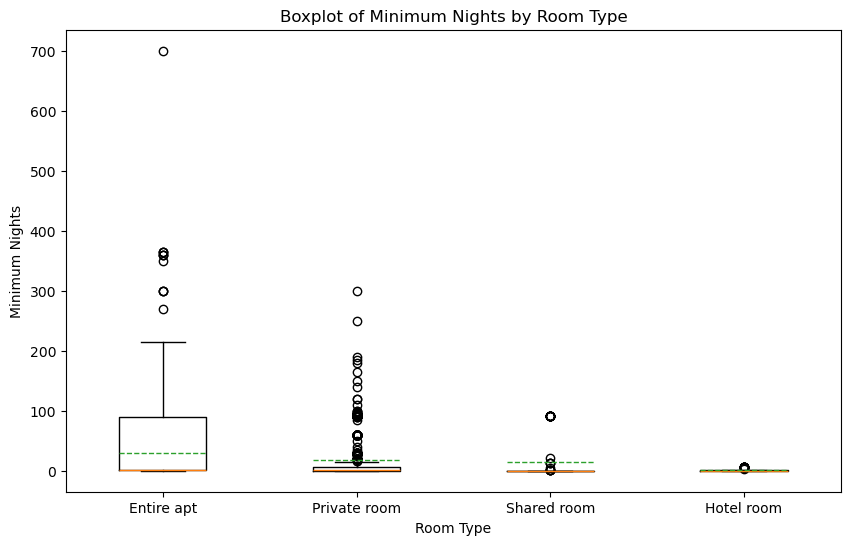

In [48]:
# Create a boxplot
plt.figure(figsize=(10, 6))
plt.boxplot([df_listing[df_listing['room_type2'] == i]['minimum_nights'] for i in range(4)], 
            labels=["Entire apt", "Private room", "Shared room", "Hotel room"],
            showmeans=True, meanline=True)

# Add labels and title
plt.title('Boxplot of Minimum Nights by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Minimum Nights')

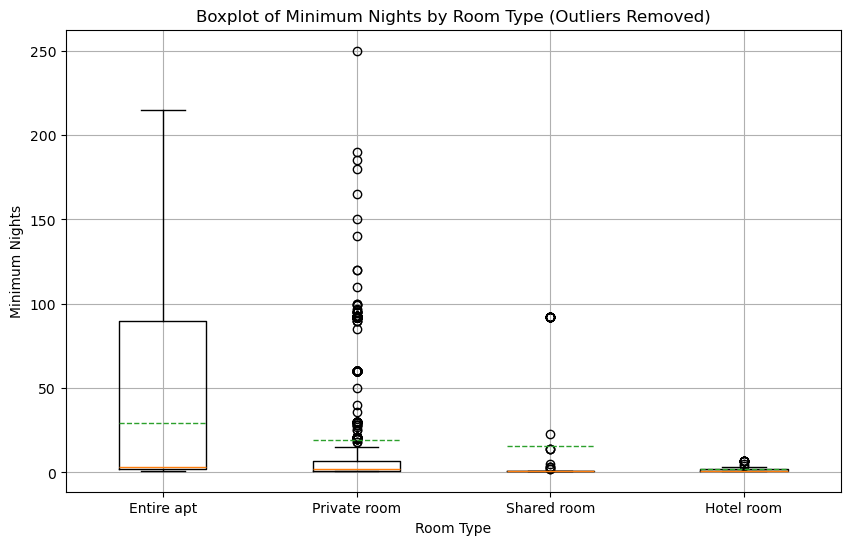

In [49]:

# Filter the data to remove outliers
filtered_data = df_listing[df_listing['minimum_nights'] <= 250]

# Create a boxplot
plt.figure(figsize=(10, 6))
plt.boxplot([filtered_data[filtered_data['room_type2'] == i]['minimum_nights'] for i in range(4)], 
            labels=["Entire apt", "Private room", "Shared room", "Hotel room"],
            showmeans=True, meanline=True)

# Add labels and title
plt.title('Boxplot of Minimum Nights by Room Type (Outliers Removed)')
plt.xlabel('Room Type')
plt.ylabel('Minimum Nights')
plt.grid(True)

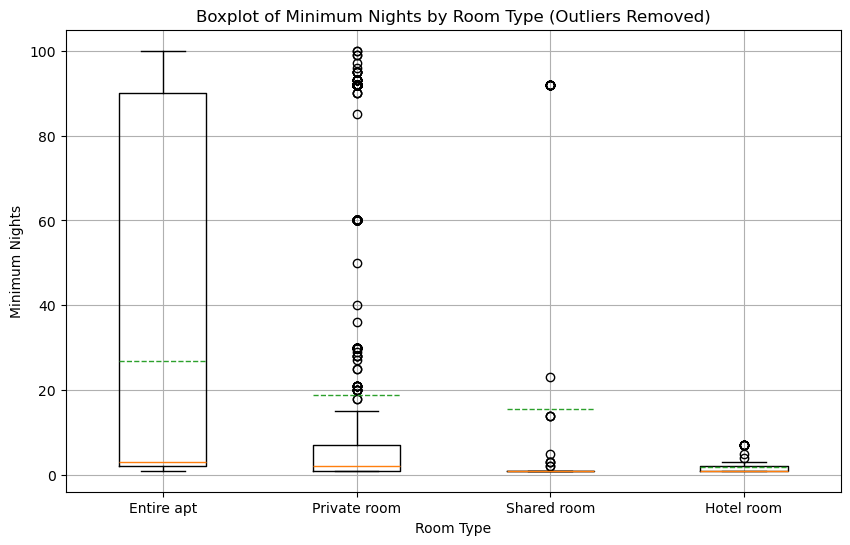

In [50]:

# Filter the data to remove outliers
filtered_data = df_listing[df_listing['minimum_nights'] <= 100]

# Create a boxplot
plt.figure(figsize=(10, 6))
plt.boxplot([filtered_data[filtered_data['room_type2'] == i]['minimum_nights'] for i in range(4)], 
            labels=["Entire apt", "Private room", "Shared room", "Hotel room"],
            showmeans=True, meanline=True)

# Add labels and title
plt.title('Boxplot of Minimum Nights by Room Type (Outliers Removed)')
plt.xlabel('Room Type')
plt.ylabel('Minimum Nights')
plt.grid(True)

## Observations
Looking at this data, there's probably a relationship between certain number of nights minimum and the type of apartment. But I also think I should try separating the minimum nights into short vs long term stays, perhaps adding a column defining stays into the categories 3 days or less, 1 week or less, 1 month or less, 3 months or less and then 1 year or more.

In [51]:
## Creating a pairplot

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

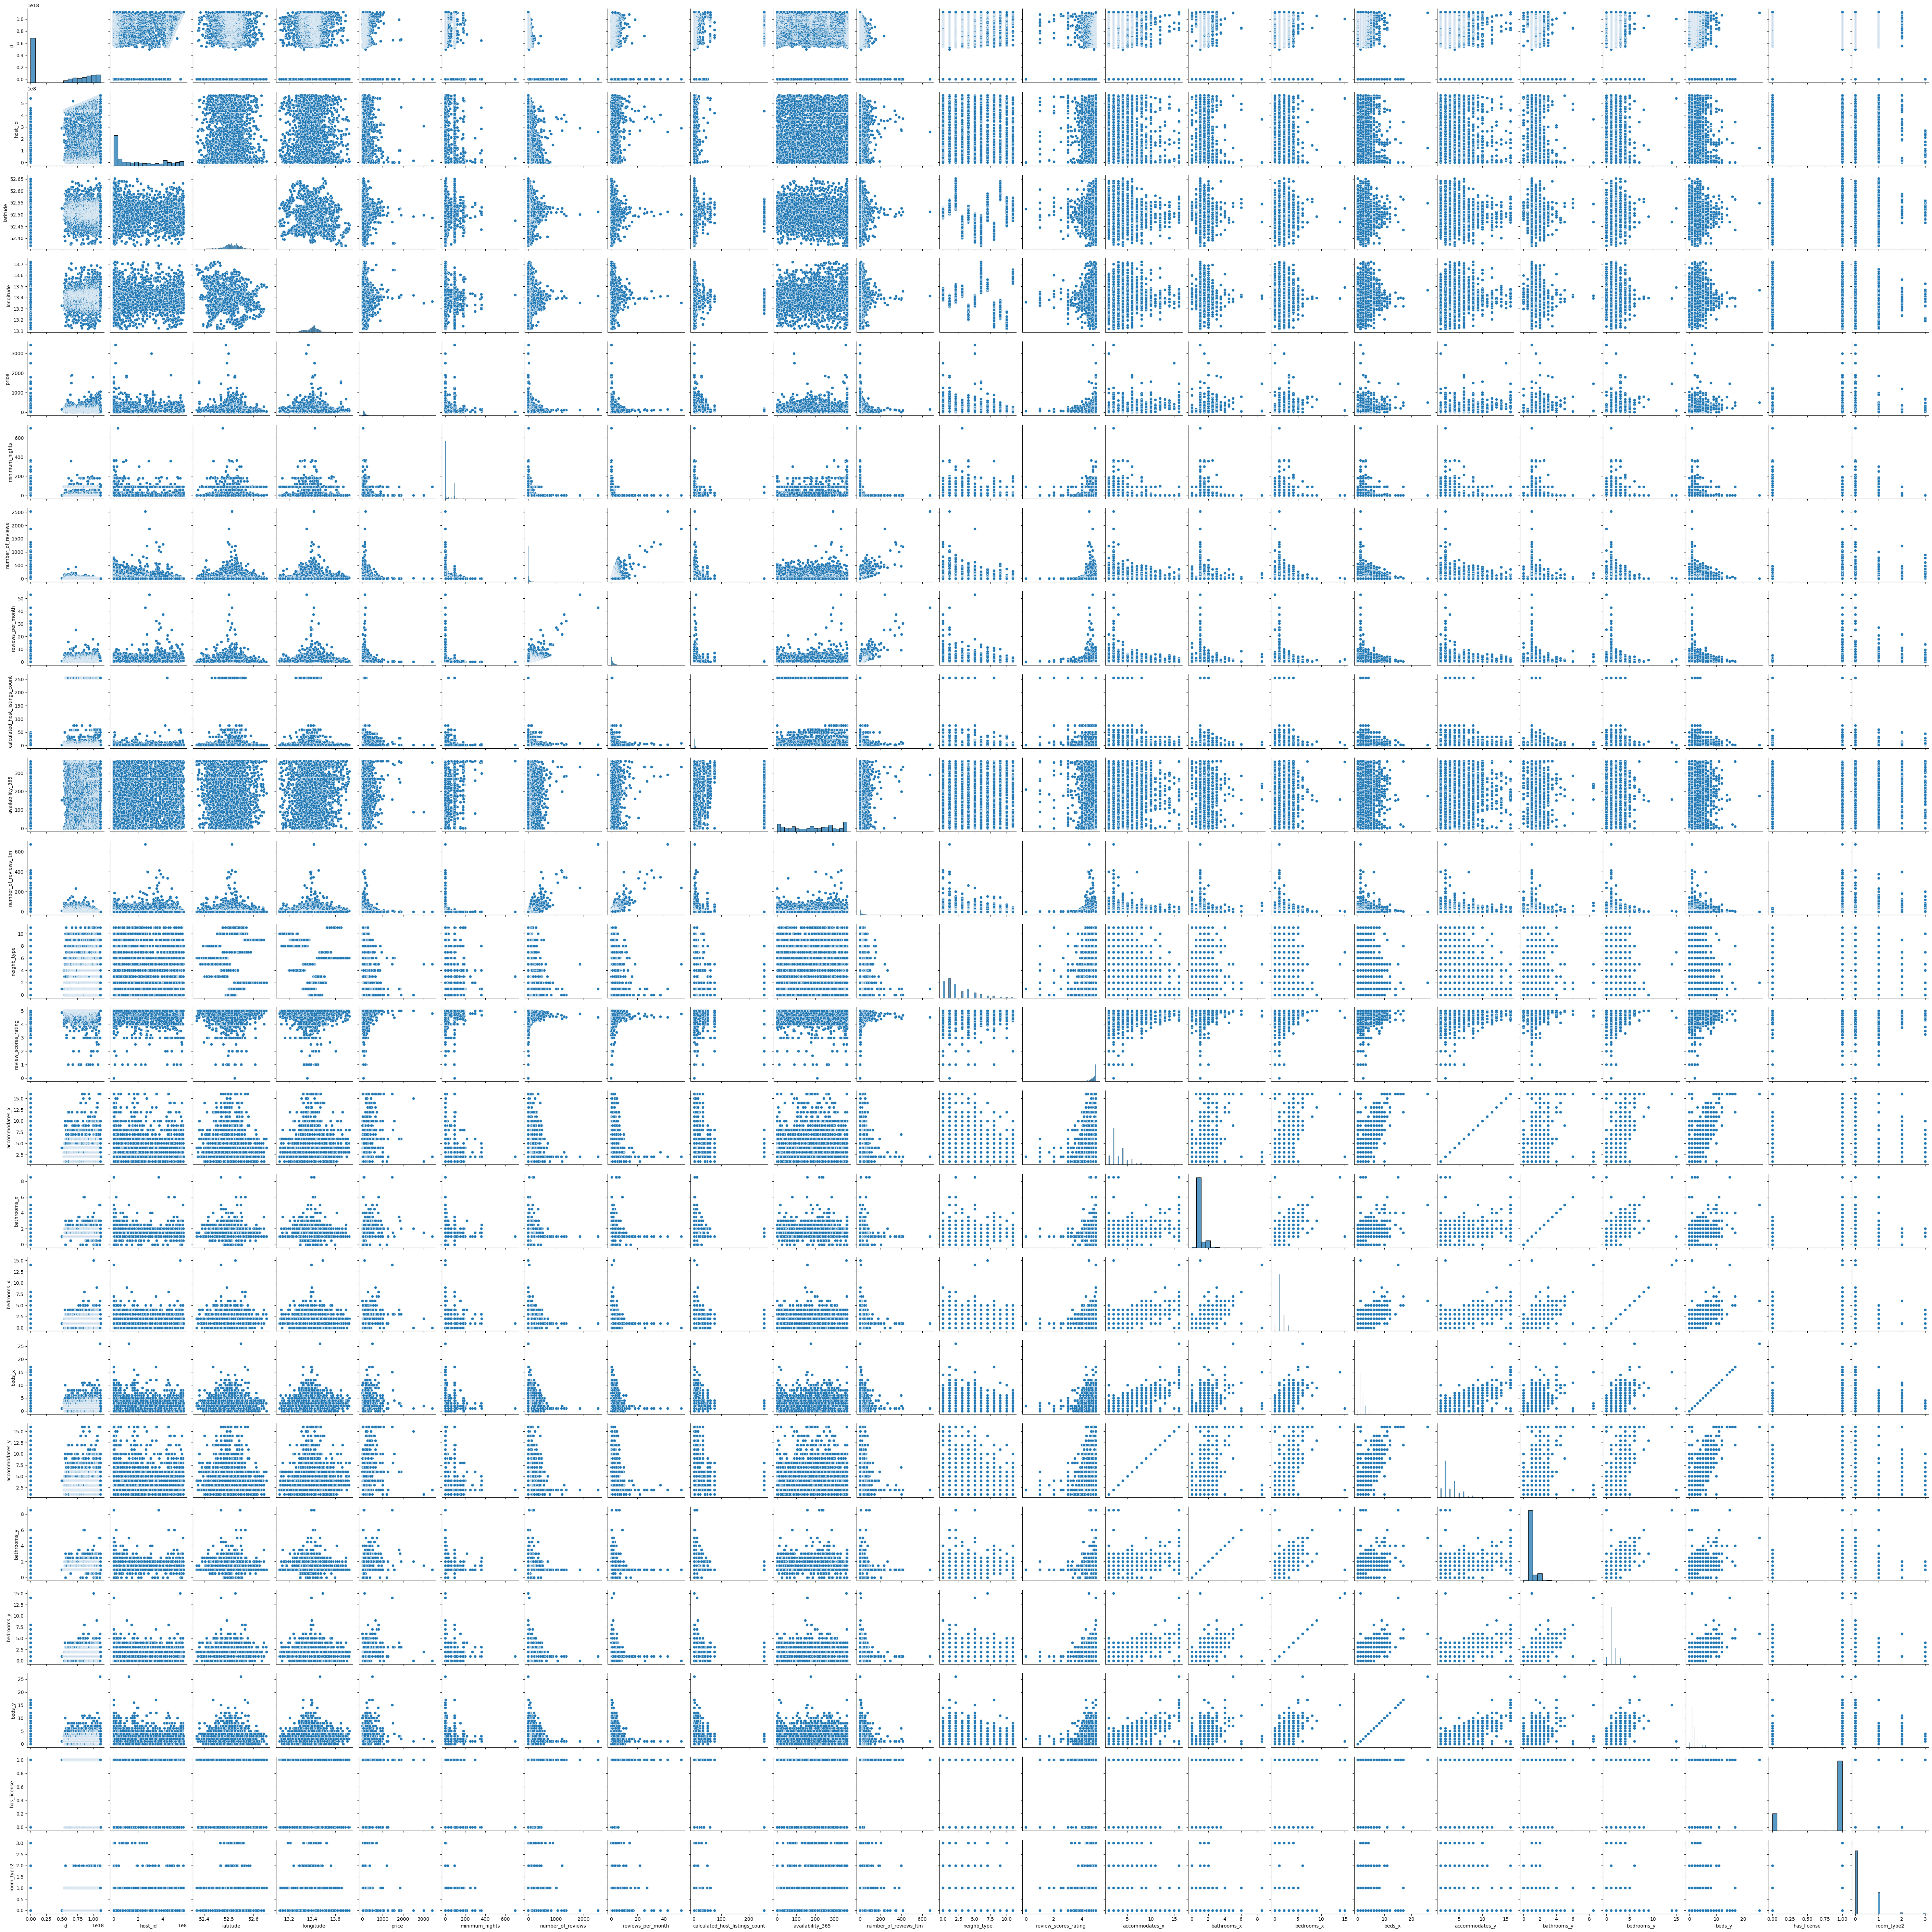

In [52]:

# Select non-string columns
numeric_columns = df_listing.select_dtypes(include=['int', 'float'])

# Create pair plot
sns.pairplot(numeric_columns)
plt.show()


In [53]:
def categorize_minimum_nights(minimum_nights):
    if minimum_nights <= 3:
        return 0
    elif 4 <= minimum_nights <= 7:
        return 1
    elif 8 <= minimum_nights <= 30:
        return 2
    elif 31 <= minimum_nights <= 91:
        return 3
    else:
        return 4

# Apply the function to create a new column
df_listing['short_long_stay'] = df_listing['minimum_nights'].apply(categorize_minimum_nights)


In [54]:
df_listing.head()

id  host_id       neighbourhood_group             neighbourhood  \
0   3176     3718                    Pankow   Prenzlauer Berg Südwest   
1   9991    33852                    Pankow   Prenzlauer Berg Südwest   
2  14325    55531                    Pankow  Prenzlauer Berg Nordwest   
3  16644    64696  Friedrichshain-Kreuzberg     nördliche Luisenstadt   
4  17904    68997                  Neukölln              Reuterstraße   

   latitude  longitude        room_type  price  minimum_nights  \
0        53         13  Entire home/apt     83              63   
1        53         13  Entire home/apt    180               6   
2        53         13  Entire home/apt     70             150   
3        53         13  Entire home/apt     90              93   
4        52         13  Entire home/apt     25              92   

   number_of_reviews last_review  reviews_per_month  \
0                148  2023-05-25                  1   
1                  7  2020-01-04                  0   
2                 26  2023-11-30                  0   
3                 48  2017-12-14                  0   
4                299  2022-12-01                  2   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
0                               1               112                      1   
1                               1                17                      0   
2                               4               204                      1   
3                               2               230                      0   
4                               1                 1                      0   

   neighb_type  review_scores_rating  accommodates_x  bathrooms_x  bedrooms_x  \
0            2                     5               4            1           1   
1            2                     5               7            2           4   
2            2                     5               1            1           0   
3            0                     5               4            1           1   
4            3                     5               2            1           0   

   beds_x                                        amenities_x  \
0       2  ["Hangers", "Crib", "Smoke alarm", "Fire extin...   
1       7  ["Hangers", "Smoke alarm", "Heating", "Luggage...   
2       1  ["Hangers", "Smoke alarm", "Heating", "Kitchen...   
3       1  ["Hangers", "Carbon monoxide alarm", "Smoke al...   
4       1  ["Hangers", "Self check-in", "Iron", "Heating"...   

  host_is_superhost_x host_response_rate_x host_acceptance_rate_x  \
0                   f                  NaN                     0%   
1                   f                   0%                     0%   
2                   t                 100%                    36%   
3                   f                 100%                    50%   
4                   t                 100%                    98%   

   accommodates_y  bathrooms_y  bedrooms_y  beds_y  \
0               4            1           1       2   
1               7            2           4       7   
2               1            1           0       1   
3               4            1           1       1   
4               2            1           0       1   

                                         amenities_y host_is_superhost_y  \
0  ["Hangers", "Crib", "Smoke alarm", "Fire extin...                   f   
1  ["Hangers", "Smoke alarm", "Heating", "Luggage...                   f   
2  ["Hangers", "Smoke alarm", "Heating", "Kitchen...                   t   
3  ["Hangers", "Carbon monoxide alarm", "Smoke al...                   f   
4  ["Hangers", "Self check-in", "Iron", "Heating"...                   t   

  host_response_rate_y host_acceptance_rate_y  has_license  room_type2  \
0                  NaN                     0%            1           0   
1                   0%                     0%            1           0   
2                 100%                    36%            0           0   
3    

([<matplotlib.axis.XTick at 0x1743bf350>,
 [Text(0, 0, 'Entire apt'),
  Text(1, 0, 'Private room'),
  Text(2, 0, 'Shared room'),
  Text(3, 0, 'Hotel room')])

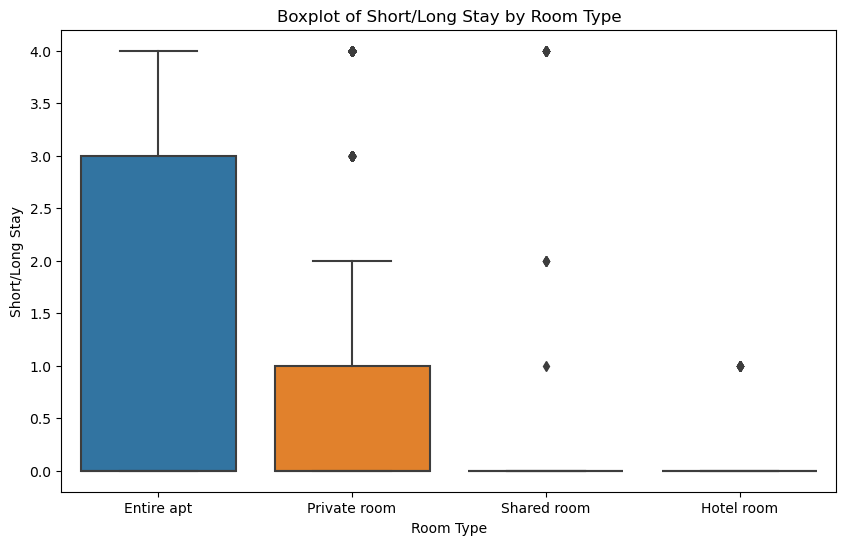

In [55]:
# Create a boxplot 
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='short_long_stay', data=df_listing)
plt.title('Boxplot of Short/Long Stay by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Short/Long Stay')

# Customize x-axis labels to display only integers
plt.xticks(ticks=[0, 1, 2, 3], labels=["Entire apt", "Private room", "Shared room", "Hotel room"])


<Figure size 1200x800 with 0 Axes>

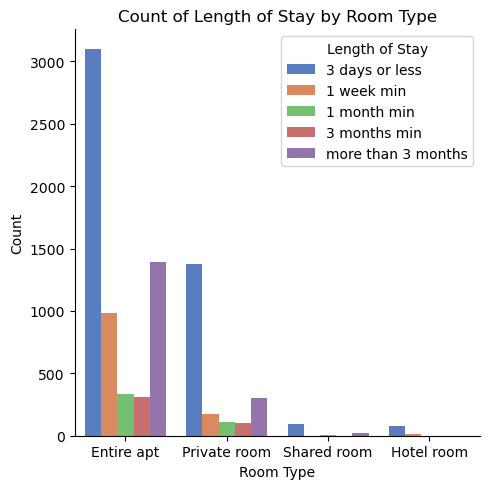

In [56]:
# Define custom labels for short_long_stay
short_long_stay_labels = {
    0: "3 days or less",
    1: "1 week min",
    2: "1 month min",
    3: "3 months min",
    4: "more than 3 months"
}
# Define the path to the folder
path2 = r'/Users/quincy/Documents/CF_Da/6/Airbnb Berlin/04 Visualization'

# Create a categorical plot
plt.figure(figsize=(12, 8))
sns.catplot(x='room_type', hue='short_long_stay', kind='count', data=df_listing, palette='muted', legend=False)
plt.title('Count of Length of Stay by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Count')

# Customize x-axis labels to display only integers
plt.xticks(ticks=[0, 1, 2, 3], labels=["Entire apt", "Private room", "Shared room", "Hotel room"])

# Set custom legend labels
plt.legend(title='Length of Stay', labels=[short_long_stay_labels[i] for i in range(5)])

# Adjust layout to prevent title from being cut off
plt.tight_layout()

# Save the plot to the specified folder
plt.savefig(os.path.join(path2, 'length_of_stay_by_room_type.png'))


## Observations

As we can see here, it looks like the vast majority of stays are short (3 days or less) or long (over 3 months). This is especially true for private spaces. In hotel rooms, there are virtually none that require longer stays. 

Revisiting the questions from the previous exercise, I can see that I need to get some more data from public datasets to conduct more exploration and create more options for hypothesis testing. I suspect there might be some more interesting results if we look at geographical data, so I'll hold off on writing hypothesies until that step.  If there's still nothing at that point, then I'll look into suplementing this dataset with another. 

In [57]:
df_listing.head()

id  host_id       neighbourhood_group             neighbourhood  \
0   3176     3718                    Pankow   Prenzlauer Berg Südwest   
1   9991    33852                    Pankow   Prenzlauer Berg Südwest   
2  14325    55531                    Pankow  Prenzlauer Berg Nordwest   
3  16644    64696  Friedrichshain-Kreuzberg     nördliche Luisenstadt   
4  17904    68997                  Neukölln              Reuterstraße   

   latitude  longitude        room_type  price  minimum_nights  \
0        53         13  Entire home/apt     83              63   
1        53         13  Entire home/apt    180               6   
2        53         13  Entire home/apt     70             150   
3        53         13  Entire home/apt     90              93   
4        52         13  Entire home/apt     25              92   

   number_of_reviews last_review  reviews_per_month  \
0                148  2023-05-25                  1   
1                  7  2020-01-04                  0   
2                 26  2023-11-30                  0   
3                 48  2017-12-14                  0   
4                299  2022-12-01                  2   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
0                               1               112                      1   
1                               1                17                      0   
2                               4               204                      1   
3                               2               230                      0   
4                               1                 1                      0   

   neighb_type  review_scores_rating  accommodates_x  bathrooms_x  bedrooms_x  \
0            2                     5               4            1           1   
1            2                     5               7            2           4   
2            2                     5               1            1           0   
3            0                     5               4            1           1   
4            3                     5               2            1           0   

   beds_x                                        amenities_x  \
0       2  ["Hangers", "Crib", "Smoke alarm", "Fire extin...   
1       7  ["Hangers", "Smoke alarm", "Heating", "Luggage...   
2       1  ["Hangers", "Smoke alarm", "Heating", "Kitchen...   
3       1  ["Hangers", "Carbon monoxide alarm", "Smoke al...   
4       1  ["Hangers", "Self check-in", "Iron", "Heating"...   

  host_is_superhost_x host_response_rate_x host_acceptance_rate_x  \
0                   f                  NaN                     0%   
1                   f                   0%                     0%   
2                   t                 100%                    36%   
3                   f                 100%                    50%   
4                   t                 100%                    98%   

   accommodates_y  bathrooms_y  bedrooms_y  beds_y  \
0               4            1           1       2   
1               7            2           4       7   
2               1            1           0       1   
3               4            1           1       1   
4               2            1           0       1   

                                         amenities_y host_is_superhost_y  \
0  ["Hangers", "Crib", "Smoke alarm", "Fire extin...                   f   
1  ["Hangers", "Smoke alarm", "Heating", "Luggage...                   f   
2  ["Hangers", "Smoke alarm", "Heating", "Kitchen...                   t   
3  ["Hangers", "Carbon monoxide alarm", "Smoke al...                   f   
4  ["Hangers", "Self check-in", "Iron", "Heating"...                   t   

  host_response_rate_y host_acceptance_rate_y  has_license  room_type2  \
0                  NaN                     0%            1           0   
1                   0%                     0%            1           0   
2                 100%                    36%            0           0   
3    

In [58]:
# List of columns to drop
columns_to_drop = ['accommodates_y', 'bathrooms_y', 'bedrooms_y', 'beds_y', 
                   'amenities_y', 'host_is_superhost_y', 'host_response_rate_y', 'host_acceptance_rate_y']

# Drop the columns
df_listing.drop(columns=columns_to_drop, inplace=True)

# Display the first few rows of the updated dataframe to verify
df_listing.head()


id  host_id       neighbourhood_group             neighbourhood  \
0   3176     3718                    Pankow   Prenzlauer Berg Südwest   
1   9991    33852                    Pankow   Prenzlauer Berg Südwest   
2  14325    55531                    Pankow  Prenzlauer Berg Nordwest   
3  16644    64696  Friedrichshain-Kreuzberg     nördliche Luisenstadt   
4  17904    68997                  Neukölln              Reuterstraße   

   latitude  longitude        room_type  price  minimum_nights  \
0        53         13  Entire home/apt     83              63   
1        53         13  Entire home/apt    180               6   
2        53         13  Entire home/apt     70             150   
3        53         13  Entire home/apt     90              93   
4        52         13  Entire home/apt     25              92   

   number_of_reviews last_review  reviews_per_month  \
0                148  2023-05-25                  1   
1                  7  2020-01-04                  0   
2                 26  2023-11-30                  0   
3                 48  2017-12-14                  0   
4                299  2022-12-01                  2   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
0                               1               112                      1   
1                               1                17                      0   
2                               4               204                      1   
3                               2               230                      0   
4                               1                 1                      0   

   neighb_type  review_scores_rating  accommodates_x  bathrooms_x  bedrooms_x  \
0            2                     5               4            1           1   
1            2                     5               7            2           4   
2            2                     5               1            1           0   
3            0                     5               4            1           1   
4            3                     5               2            1           0   

   beds_x                                        amenities_x  \
0       2  ["Hangers", "Crib", "Smoke alarm", "Fire extin...   
1       7  ["Hangers", "Smoke alarm", "Heating", "Luggage...   
2       1  ["Hangers", "Smoke alarm", "Heating", "Kitchen...   
3       1  ["Hangers", "Carbon monoxide alarm", "Smoke al...   
4       1  ["Hangers", "Self check-in", "Iron", "Heating"...   

  host_is_superhost_x host_response_rate_x host_acceptance_rate_x  \
0                   f                  NaN                     0%   
1                   f                   0%                     0%   
2                   t                 100%                    36%   
3                   f                 100%                    50%   
4                   t                 100%                    98%   

   has_license  room_type2  short_long_stay  
0            1           0                3  
1            1           0                1  
2            0           0                4  
3            0           0                4  
4            0           0                4

In [59]:
# Dictionary mapping old column names to new column names
columns_to_rename = {
    'accommodates_x': 'accommodates',
    'bathrooms_x': 'bathrooms',
    'bedrooms_x': 'bedrooms',
    'beds_x': 'beds',
    'amenities_x': 'amenities',
    'host_is_superhost_x': 'host_is_superhost',
    'host_response_rate_x': 'host_response_rate',
    'host_acceptance_rate_x': 'host_acceptance_rate'
}

# Rename the columns
df_listing.rename(columns=columns_to_rename, inplace=True)
df_listing.head()

id  host_id       neighbourhood_group             neighbourhood  \
0   3176     3718                    Pankow   Prenzlauer Berg Südwest   
1   9991    33852                    Pankow   Prenzlauer Berg Südwest   
2  14325    55531                    Pankow  Prenzlauer Berg Nordwest   
3  16644    64696  Friedrichshain-Kreuzberg     nördliche Luisenstadt   
4  17904    68997                  Neukölln              Reuterstraße   

   latitude  longitude        room_type  price  minimum_nights  \
0        53         13  Entire home/apt     83              63   
1        53         13  Entire home/apt    180               6   
2        53         13  Entire home/apt     70             150   
3        53         13  Entire home/apt     90              93   
4        52         13  Entire home/apt     25              92   

   number_of_reviews last_review  reviews_per_month  \
0                148  2023-05-25                  1   
1                  7  2020-01-04                  0   
2                 26  2023-11-30                  0   
3                 48  2017-12-14                  0   
4                299  2022-12-01                  2   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
0                               1               112                      1   
1                               1                17                      0   
2                               4               204                      1   
3                               2               230                      0   
4                               1                 1                      0   

   neighb_type  review_scores_rating  accommodates  bathrooms  bedrooms  beds  \
0            2                     5             4          1         1     2   
1            2                     5             7          2         4     7   
2            2                     5             1          1         0     1   
3            0                     5             4          1         1     1   
4            3                     5             2          1         0     1   

                                           amenities host_is_superhost  \
0  ["Hangers", "Crib", "Smoke alarm", "Fire extin...                 f   
1  ["Hangers", "Smoke alarm", "Heating", "Luggage...                 f   
2  ["Hangers", "Smoke alarm", "Heating", "Kitchen...                 t   
3  ["Hangers", "Carbon monoxide alarm", "Smoke al...                 f   
4  ["Hangers", "Self check-in", "Iron", "Heating"...                 t   

  host_response_rate host_acceptance_rate  has_license  room_type2  \
0                NaN                   0%            1           0   
1                 0%                   0%            1           0   
2               100%                  36%            0           0   
3               100%                  50%            0           0   
4               100%                  98%            0           0   

   short_long_stay  
0                3  
1                1  
2                4  
3                4  
4                4

## Export Dataset

In [60]:
# Define the path to the folder
export_path = r'/Users/quincy/Documents/CF_Da/6/Airbnb Berlin/02 Data/Cleaned Data/df_listing_cleaned.csv'

# Export the DataFrame to a CSV file
df_listing.to_csv(export_path, index=False)

print(f"DataFrame successfully exported to {export_path}")

DataFrame successfully exported to /Users/quincy/Documents/CF_Da/6/Airbnb Berlin/02 Data/Cleaned Data/df_listing_cleaned.csv
